C:\Users\xgabr\AppData\Local\Temp\ipykernel_28624\805454501.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax.plot([x_start, x_finish], [float(y_start), float(y_finish)], linestyle='-', color = color.values[0])
C:\Users\xgabr\AppData\Local\Temp\ipykernel_28624\805454501.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.text(ax.get_xlim()[0] - 0.05, y_start, r'{}:{}k'.format(cont, int(y_start)/1000), horizontalalignment = 'right', va='center', fontdict={'size':8})
C:\Users\xgabr\AppData\Local\Temp\ipykernel_28624\805454501.py:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.text(ax.get_xlim()[1] + 0.05, y_finish, r'{}:{}k'.format(cont, int(y_finish)/1000), horizontalalignment='left', ver

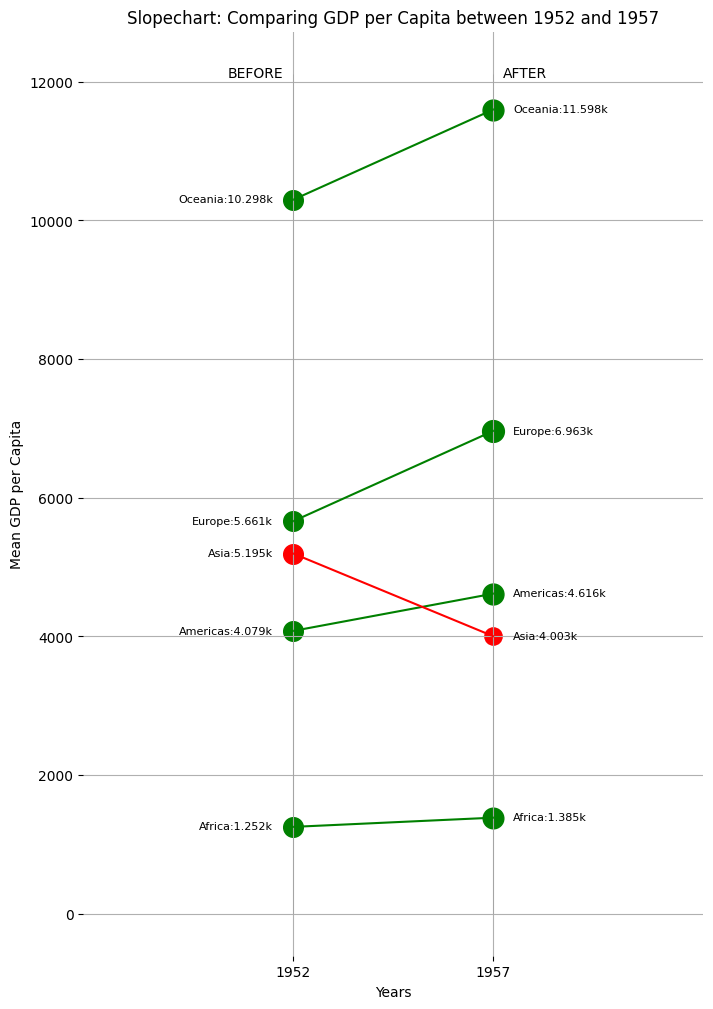

In [7]:
from imports import *
PATH = '../data/gdppercap.csv'
df = pd.read_csv(PATH)

df['color'] = df.apply(lambda row: 'green' if row['1957'] >= row['1952'] else 'red', axis=1)
fig = plt.figure(figsize=(8, 12))
ax=fig.add_subplot()

for cont in df['continent']:
    # prepare the data for plotting
    # extract each point and the color
    x_start = df.columns[1]
    x_finish = df.columns[2]
    y_start = df[df['continent'] == cont]['1952']
    y_finish = df[df['continent'] == cont]['1957']
    color = df[df['continent'] == cont]['color']
    
    ax.scatter(x_start, y_start, color = color, s=200)
    ax.scatter(x_finish, y_finish, color = color, s = 200 * (y_finish / y_start))
    
    ax.plot([x_start, x_finish], [float(y_start), float(y_finish)], linestyle='-', color = color.values[0])
    
    # annotate the value for each continent
    ax.text(ax.get_xlim()[0] - 0.05, y_start, r'{}:{}k'.format(cont, int(y_start)/1000), horizontalalignment = 'right', va='center', fontdict={'size':8})
    ax.text(ax.get_xlim()[1] + 0.05, y_finish, r'{}:{}k'.format(cont, int(y_finish)/1000), horizontalalignment='left', verticalalignment='center', fontdict={'size': 8})

x_lims = ax.get_xlim()
y_lims = ax.get_ylim()

ax.set_xlim(x_lims[0]-1, x_lims[1] + 1)

# add 2 vertical lines
ax.vlines(x_start, 0, y_lims[1], color='grey', alpha=0.3, lw=0.5)
ax.vlines(x_finish, 0, y_lims[1], color='grey', alpha=0.3, lw=0.5)

ax.text(x_lims[0], y_lims[1], 'BEFORE', horizontalalignment = 'right', verticalalignment='center')
ax.text(x_lims[1], y_lims[1], 'AFTER', horizontalalignment = 'left', verticalalignment='center')

# set and x and y label
ax.set_xlabel('Years')
ax.set_ylabel('Mean GDP per Capita')

# add a title
ax.set_title('Slopechart: Comparing GDP per Capita between 1952 and 1957')

ax.spines['left'].set_color('None')
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
ax.spines['bottom'].set_color('None')
plt.grid()

# More info: 
# https://datavizproject.com/data-type/slope-chart/